In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Utils

In [14]:
def imshow(*args, figsize=10, to_rgb=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    if to_rgb:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    if title is not None:
        assert len(title) == len(images), "Please provide a title for each image."
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        plt.imshow(images[i-1], cmap = 'gray')
        plt.axis('off')

In [15]:
def down_scale(img):
  # Get the original image shape
  original_shape = img.shape[:2][::-1]

  # Calculate the new shape by downscaling the original shape by a factor of 8
  new_shape = tuple(map(lambda x: x // 8, original_shape))

  # Resize the image to the new shape
  img_downscaled = cv2.resize(img, new_shape, interpolation=cv2.INTER_AREA)

  return img_downscaled

#Practice 7

## practice 7.1.1

In [16]:
def normalize(a):
    if isinstance(a, list):
        return list(map(normalize, a))
    if isinstance(a, tuple):
        return tuple(normalize(list(a)))
    values = (((a - a.min()) / (a.max() - a.min())) * 255)
    values = values.astype('uint8')
    return values

In [17]:
def Harris_Corner_Detector(img, threshold=0.1, scale=1.0):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    gray = cv2.resize(gray, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    interest_points = np.column_stack(np.where(dst > threshold * dst.max()))
    interest_points = interest_points / scale
    return interest_points

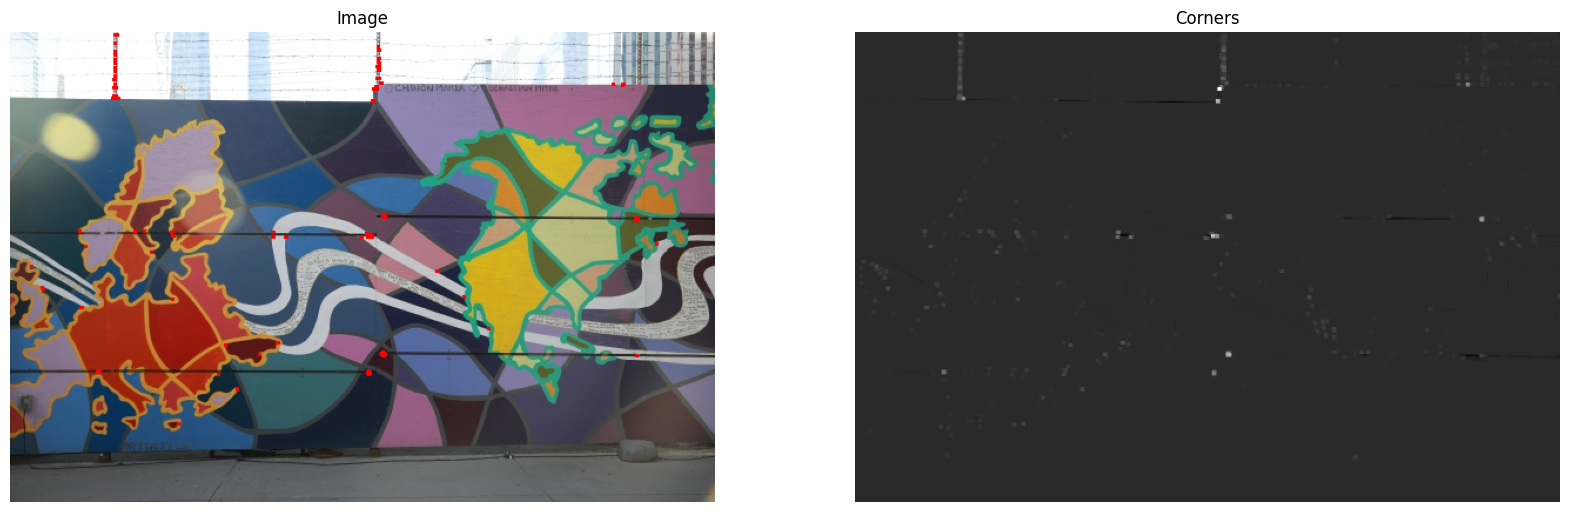

In [18]:
harris_image = cv2.imread('harris.JPG')

gray_img = cv2.cvtColor(harris_image, cv2.COLOR_BGR2GRAY).astype('float32')
corners = cv2.cornerHarris(gray_img, blockSize=2, ksize=3, k=0.04)

# Apply dilation to make the corner dots bigger
corners = cv2.dilate(corners, None)

# Threshold
threshold=0.1
cornsers_thresh = corners > (threshold * corners.max())

# mark F_points in red color in main image
harris_image[cornsers_thresh] = [0, 0, 255]

corners = normalize(corners)

imshow(harris_image, corners, title=['Image', 'Corners'], figsize=20)

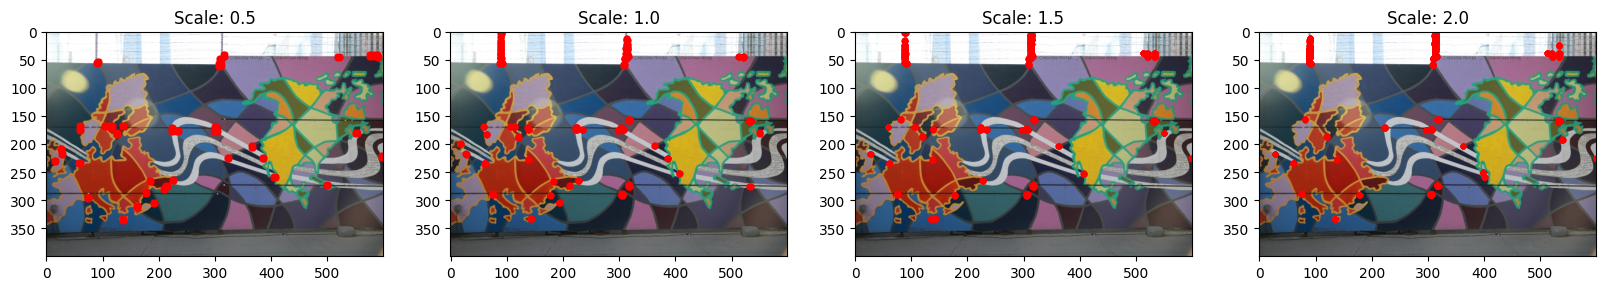

In [19]:
img = cv2.imread('harris.JPG')

scales = [0.5, 1.0, 1.5, 2.0]
interest_points = []
for scale in scales:
    interest_points.append(Harris_Corner_Detector(img, scale=scale))

fig, axs = plt.subplots(1, len(scales), figsize=(20, 5))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.scatter(interest_points[i][:, 1], interest_points[i][:, 0], color='red', s=10)
    ax.set_title('Scale: {}'.format(scales[i]))
plt.show()

## practice 7.2.1

In [20]:
def sift_matching(img1, img2, img3):
  sift = cv2.xfeatures2d.SIFT_create()
  keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
  keypoints2, descriptors2 = sift.detectAndCompute(img2, None)
  keypoints3, descriptors3 = sift.detectAndCompute(img3, None)

  bf = cv2.BFMatcher()
  matches12 = bf.knnMatch(descriptors1, descriptors2, k=2)
  matches13 = bf.knnMatch(descriptors1, descriptors3, k=2)
  matches23 = bf.knnMatch(descriptors2, descriptors3, k=2)

  good_matches12 = []
  for m, n in matches12:
      if m.distance < 0.75 * n.distance:
          good_matches12.append(m)

  good_matches13 = []
  for m, n in matches13:
      if m.distance < 0.75 * n.distance:
          good_matches13.append(m)

  good_matches23 = []
  for m, n in matches23:
      if m.distance < 0.75 * n.distance:
          good_matches23.append(m)

  img_matches12 = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches12, None)
  img_matches13 = cv2.drawMatches(img1, keypoints1, img3, keypoints3, good_matches13, None)
  img_matches23 = cv2.drawMatches(img2, keypoints2, img3, keypoints3, good_matches23, None)

  return img_matches12, img_matches13, img_matches23

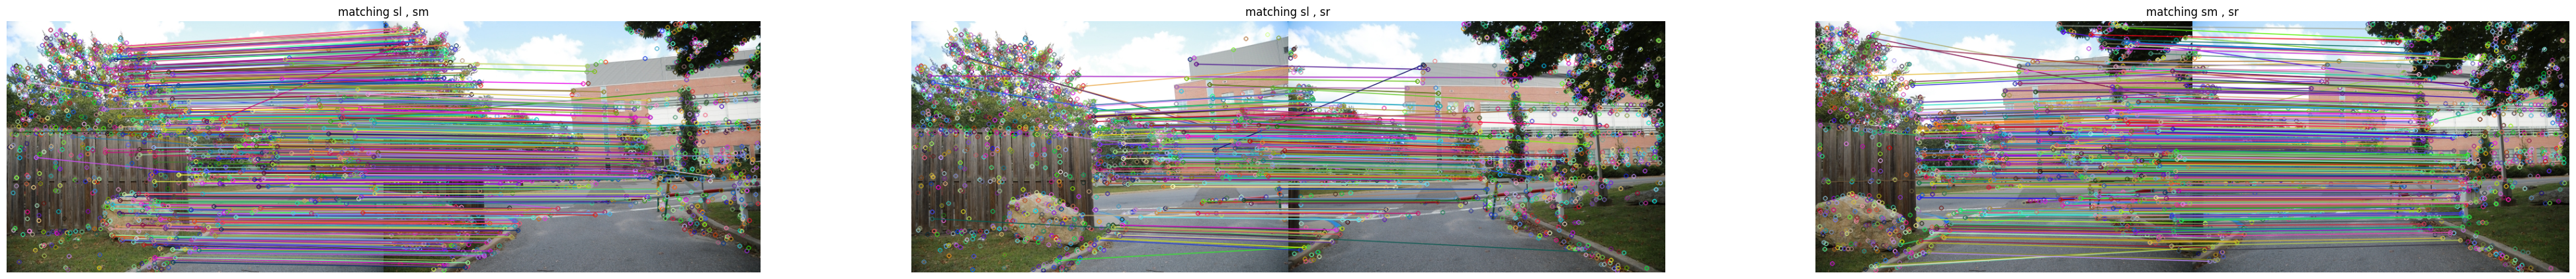

In [21]:
img1 = cv2.imread('sl.jpg')
img2 = cv2.imread('sm.jpg')
img3 = cv2.imread('sr.jpg')

matches = sift_matching(img1, img2, img3)

imshow(matches[0],matches[1], matches[2] , title = ["matching sl , sm","matching sl , sr","matching sm , sr"],figsize=50)